[![Notebook Tutorial](__code/__all/notebook_tutorial.png)](https://neutronimaging.pages.ornl.gov/en/tutorial/notebooks/display_list_of_file_name_vs_time_stamp)

<img src='__docs/__all/notebook_rules.png' />

# Select Your IPTS 

In [12]:
from __code.display_file_names_vs_time_stamp import DisplayFileNamesVsTimeStamp

%matplotlib notebook

from __code import system
system.System.select_working_dir()
from __code.__all import custom_style
custom_style.style()

** Using Debugging Mode! **


VBox(children=(HBox(children=(Label(value='IPTS-'), Text(value='', layout=Layout(width='10%')), Label(value='DOES NOT EXIST!', layout=Layout(width='20%'), _dom_classes=('result_label',)))), Label(value='OR'), HBox(children=(Label(value='Select Folder', layout=Layout(width='20%')), Select(layout=Layout(height='300px'), options=('BraggEdge', 'Brianne', 'DOE_letters', 'FITSimages', 'IPTS-12534', 'IPTS-13639_resonance_shawn', 'IPTS-14832', 'IPTS-15177', 'IPTS-16212', 'IPTS-16259', 'IPTS-16475', 'IPTS-16893', 'IPTS-17099', 'IPTS-17685-Siddharth', 'IPTS-17981', 'IPTS-18580', 'IPTS-18806', 'IPTS-18813', 'IPTS-19037', 'IPTS-19213', 'IPTS-19558', 'IPTS-19621-CLOCK', 'IPTS-19626', 'IPTS-19799', 'IPTS-19921-Charles', 'IPTS-19943-kashif', 'IPTS-20139-Hao-Liu', 'IPTS-20209-TOPAZ', 'IPTS-21115', 'IPTS-Das-Saikat', 'IPTS-raw', 'IPTS_test_normalization', 'IPTS_testing_time_spectra', 'ImagesToRegisterForGian', 'Indu', 'Keita_code', 'Pour_ibeatles_video', 'ResonanceImaging', 'SENSITIVE', 'SarmaGUI', 'SphereCoordinates3D', 'TempData', 'gian', 'iBeatles_debugging', 'shared', 'testing_Ed_algo_water_intake'), value='BraggEdge'))), Button(button_style='info', description='HELP', style=ButtonStyle())))

# Select Images

In [13]:
o_file_time_stamp = DisplayFileNamesVsTimeStamp(working_dir=system.System.get_working_dir())
o_file_time_stamp.select_image_folder()

VBox(children=(Label(value='Select Raw Images ...', layout=Layout(width='250px')), VBox(children=(HBox(children=(HBox(children=(Text(value='/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-21115', description='Location: ', layout=Layout(width='100%'), placeholder=''), Button(description='Jump', layout=Layout(border='1px solid gray', margin='5px 10px', width='100px'), style=ButtonStyle())), layout=Layout(border='1px solid lightgrey', margin='5px 50px 5px 5px', padding='3px', width='100%')),)), HBox(children=(VBox(children=(HBox(children=(Label(value='Search:'), Text(value='', layout=Layout(width='50%'))), layout=Layout(justify_content='flex-end')), SelectMultiple(description='Select', layout=Layout(height='260px', width='99%'), options=(' .', ' ..', ' .DS_Store                               |     Tue Jul 31 11:22:16 2018', ' Huggies_2cm_thick                       |     Directory', ' Huggies_2cm_thick_3rd_drop              |     Directory', ' Huggies_2nd_2cm_thick                   |     Directory', ' Huggies_3cm_5th_drop                    |     Directory', ' Huggies_3cm_thick                       |     Directory', ' Huggies_3rd_whole_tilted                |     Directory', ' Huggies_Merries                         |     Directory', ' Huggies_redo                            |     Directory', ' July25_2018                             |     Directory', ' Merries_1st_2cm_thick                   |     Directory', ' Merries_2nd                             |     Directory', ' Merries_3rd_whole                       |     Directory', ' Merries_3rd_whole_diaper_background     |     Directory', ' Merries_4th_whole_tilt                  |     Directory', ' Merries_redo                            |     Directory', ' OB                                      |     Directory', ' Videos                                  |     Directory'), value=())), layout=Layout(width='80%')), VBox(children=(Button(description='Change directory', layout=Layout(border='1px solid gray', margin='5px 40px'), style=ButtonStyle()), Button(description='Select', layout=Layout(border='1px solid blue', margin='auto 40px 5px'), style=ButtonStyle())))), layout=Layout(border='1px solid lightgrey', margin='5px', padding='10px')))), HTML(value='')))

HBox(children=(Label(value='Retrieving Time Stamp', layout=Layout(width='20%')), IntProgress(value=0, layout=Layout(width='50%'), max=302)))

#  Display Time Stamp (relative and absolute offsets)

<IPython.core.display.Javascript object>


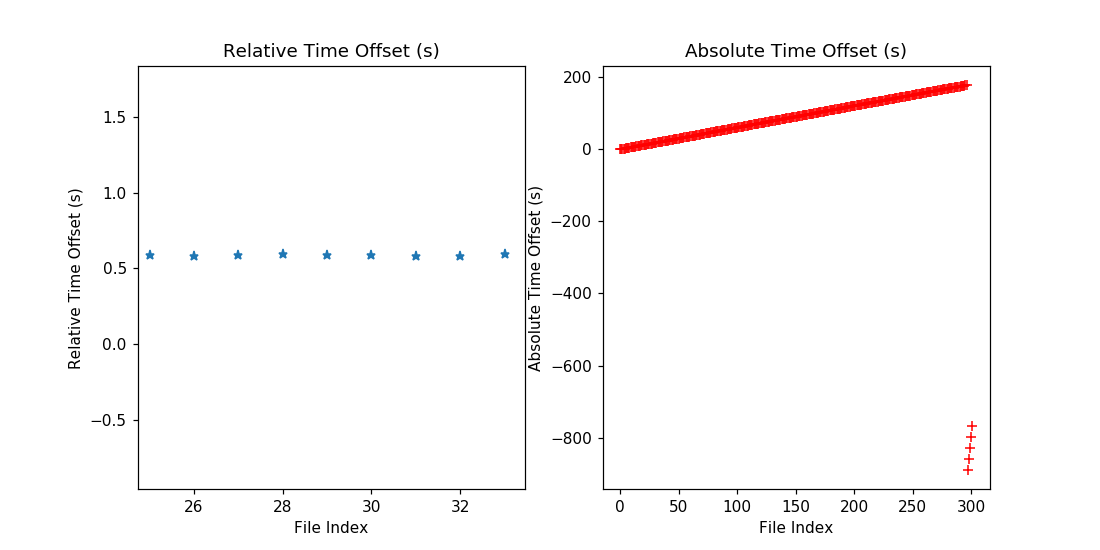

In [14]:
o_file_time_stamp.display()

# List Files Loaded 

In [15]:
o_file_time_stamp.print_result()

Tab(children=(Textarea(value='File name -> Time stamp (s)\n\n20180725_First_diaper_water_uptake_0000_1250.tiff -> 1532557915.4751625\n20180725_First_diaper_water_uptake_0000_1251.tiff -> 1532557916.0613668\n20180725_First_diaper_water_uptake_0000_1252.tiff -> 1532557916.6522331\n20180725_First_diaper_water_uptake_0000_1253.tiff -> 1532557917.2439826\n20180725_First_diaper_water_uptake_0000_1254.tiff -> 1532557917.8275356\n20180725_First_diaper_water_uptake_0000_1255.tiff -> 1532557918.4182825\n20180725_First_diaper_water_uptake_0000_1256.tiff -> 1532557919.0219738\n20180725_First_diaper_water_uptake_0000_1257.tiff -> 1532557919.6121688\n20180725_First_diaper_water_uptake_0000_1258.tiff -> 1532557920.1936388\n20180725_First_diaper_water_uptake_0000_1259.tiff -> 1532557920.7767842\n20180725_First_diaper_water_uptake_0000_1260.tiff -> 1532557921.4380898\n20180725_First_diaper_water_uptake_0000_1261.tiff -> 1532557922.0191154\n20180725_First_diaper_water_uptake_0000_1262.tiff -> 1532557922.6079972\n20180725_First_diaper_water_uptake_0000_1263.tiff -> 1532557923.194841\n20180725_First_diaper_water_uptake_0000_1264.tiff -> 1532557923.9246495\n20180725_First_diaper_water_uptake_0000_1265.tiff -> 1532557924.519782\n20180725_First_diaper_water_uptake_0000_1266.tiff -> 1532557925.3691564\n20180725_First_diaper_water_uptake_0000_1267.tiff -> 1532557925.9540315\n20180725_First_diaper_water_uptake_0000_1268.tiff -> 1532557926.5274374\n20180725_First_diaper_water_uptake_0000_1269.tiff -> 1532557927.151566\n20180725_First_diaper_water_uptake_0000_1270.tiff -> 1532557927.736755\n20180725_First_diaper_water_uptake_0000_1271.tiff -> 1532557928.3282247\n20180725_First_diaper_water_uptake_0000_1272.tiff -> 1532557928.8946223\n20180725_First_diaper_water_uptake_0000_1273.tiff -> 1532557929.4781423\n20180725_First_diaper_water_uptake_0000_1274.tiff -> 1532557930.0555472\n20180725_First_diaper_water_uptake_0000_1275.tiff -> 1532557930.6447024\n20180725_First_diaper_water_uptake_0000_1276.tiff -> 1532557931.2272754\n20180725_First_diaper_water_uptake_0000_1277.tiff -> 1532557931.8132296\n20180725_First_diaper_water_uptake_0000_1278.tiff -> 1532557932.4061978\n20180725_First_diaper_water_uptake_0000_1279.tiff -> 1532557932.9947886\n20180725_First_diaper_water_uptake_0000_1280.tiff -> 1532557933.5861034\n20180725_First_diaper_water_uptake_0000_1281.tiff -> 1532557934.1692772\n20180725_First_diaper_water_uptake_0000_1282.tiff -> 1532557934.7522278\n20180725_First_diaper_water_uptake_0000_1283.tiff -> 1532557935.3473287\n20180725_First_diaper_water_uptake_0000_1284.tiff -> 1532557935.9364185\n20180725_First_diaper_water_uptake_0000_1285.tiff -> 1532557936.519238\n20180725_First_diaper_water_uptake_0000_1286.tiff -> 1532557937.103409\n20180725_First_diaper_water_uptake_0000_1287.tiff -> 1532557937.6980937\n20180725_First_diaper_water_uptake_0000_1288.tiff -> 1532557938.2862568\n20180725_First_diaper_water_uptake_0000_1289.tiff -> 1532557938.8615546\n20180725_First_diaper_water_uptake_0000_1290.tiff -> 1532557939.443574\n20180725_First_diaper_water_uptake_0000_1291.tiff -> 1532557940.0539305\n20180725_First_diaper_water_uptake_0000_1292.tiff -> 1532557940.6577725\n20180725_First_diaper_water_uptake_0000_1293.tiff -> 1532557941.323479\n20180725_First_diaper_water_uptake_0000_1294.tiff -> 1532557941.9451447\n20180725_First_diaper_water_uptake_0000_1295.tiff -> 1532557942.5928383\n20180725_First_diaper_water_uptake_0000_1296.tiff -> 1532557943.178206\n20180725_First_diaper_water_uptake_0000_1297.tiff -> 1532557943.8012304\n20180725_First_diaper_water_uptake_0000_1298.tiff -> 1532557944.3860903\n20180725_First_diaper_water_uptake_0000_1299.tiff -> 1532557944.969782\n20180725_First_diaper_water_uptake_0000_1300.tiff -> 1532557945.5604525\n20180725_First_diaper_water_uptake_0000_1301.tiff -> 1532557946.1659153\n20180725_First_diaper_water_uptake_0000_1302.tiff -> 1532557946.7892365\n20180725_First_diaper_water_uptake_0000_1303.tiff -> 1532557947.4371562\n2018072